In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import control as ct

t = sp.Symbol('t', real=True, positive=True)
y = sp.Function('y')
ut = sp.Heaviside(t)
dq = sp.Eq(y(t).diff(t, 2) + 4*y(t).diff(t) + 3*y(t), ut)

sp.pprint(dq)

                       2           
           d          d            
3⋅y(t) + 4⋅──(y(t)) + ───(y(t)) = 1
           dt           2          
                      dt           


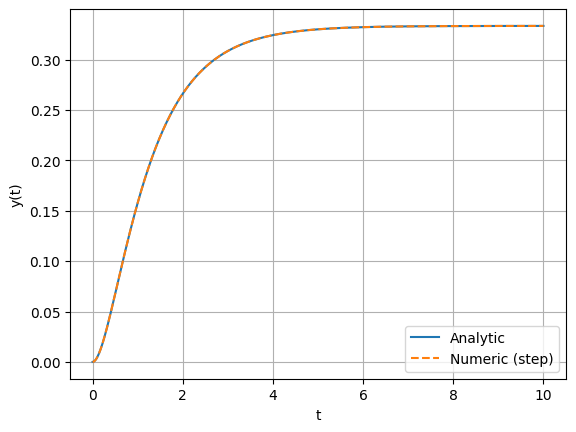

In [2]:
y0 = y(0)
dy0 = sp.Derivative(y(t), t).subs(t, 0)
ics = {y0: 0, dy0: 0}
solution = sp.dsolve(dq, y(t), ics=ics)

y_analytic = sp.simplify(solution.rhs)
y_numerical = sp.lambdify(t, y_analytic, modules=['numpy'])

# numeric step response for 1/(s^2 + 4 s + 3)
sys = ct.tf([1.0], [1.0, 4.0, 3.0])
tvals = np.linspace(0, 10, 500)
t_sys, y_step = sys.step_response(T=tvals)

plt.plot(tvals, y_numerical(tvals), label='Analytic')
plt.plot(t_sys, y_step, '--', label='Numeric (step)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()
